In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df=pd.read_csv('movies_dataset_processed.csv').drop('Unnamed: 0',axis=1)

df.head()

,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post,bucket
0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23,6.0
1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15,6.0
2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,107,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59,7.0
3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4,4.0
4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78,7.0


In [2]:
release_year=[]
for date in df['release_date']:
    date_object=datetime.datetime.strptime(date,'%Y-%m-%d')
    release_year.append(date_object.year)
df['release_year']=release_year
df.head()

,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post,bucket,release_year
0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23,6.0,2023
1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15,6.0,2023
2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,107,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59,7.0,2021
3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4,4.0,2023
4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78,7.0,2022


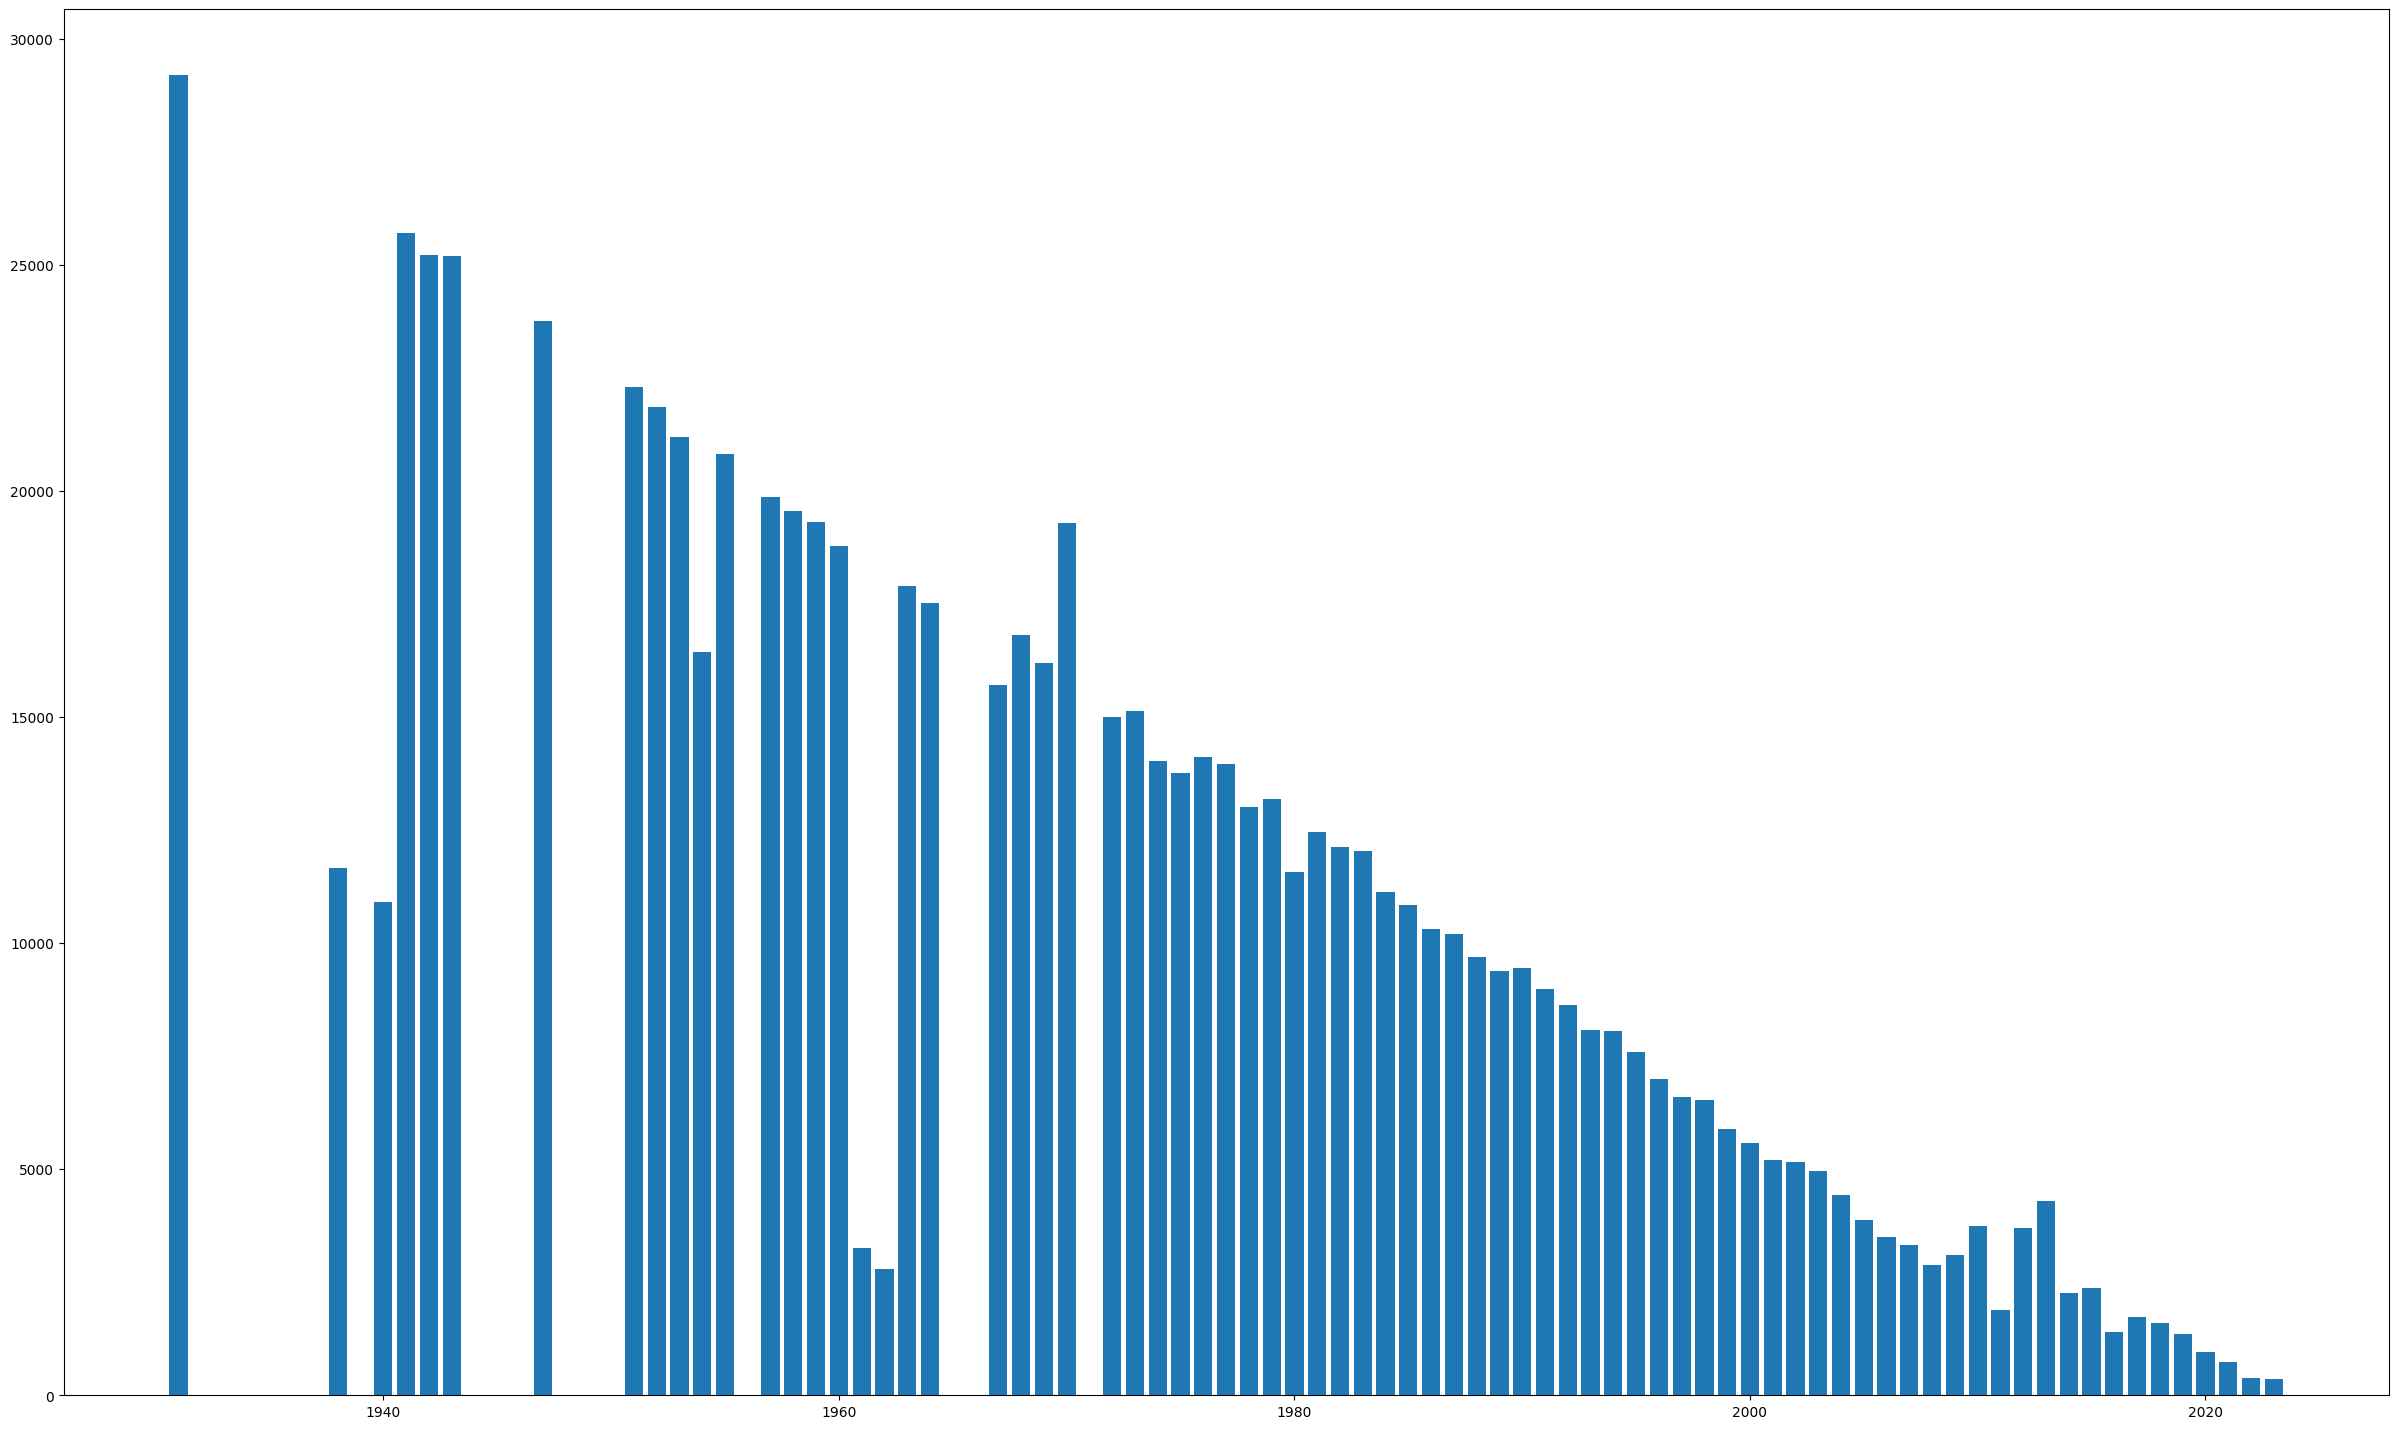

In [3]:
plt.figure(figsize=(30,18))
plt.bar(df['release_year'],df['days_to_post'])
plt.show()

Text(0.5, 1.0, 'Same but for more recent years (Namely during COVID lockdown)')

<Figure size 1000x600 with 0 Axes>

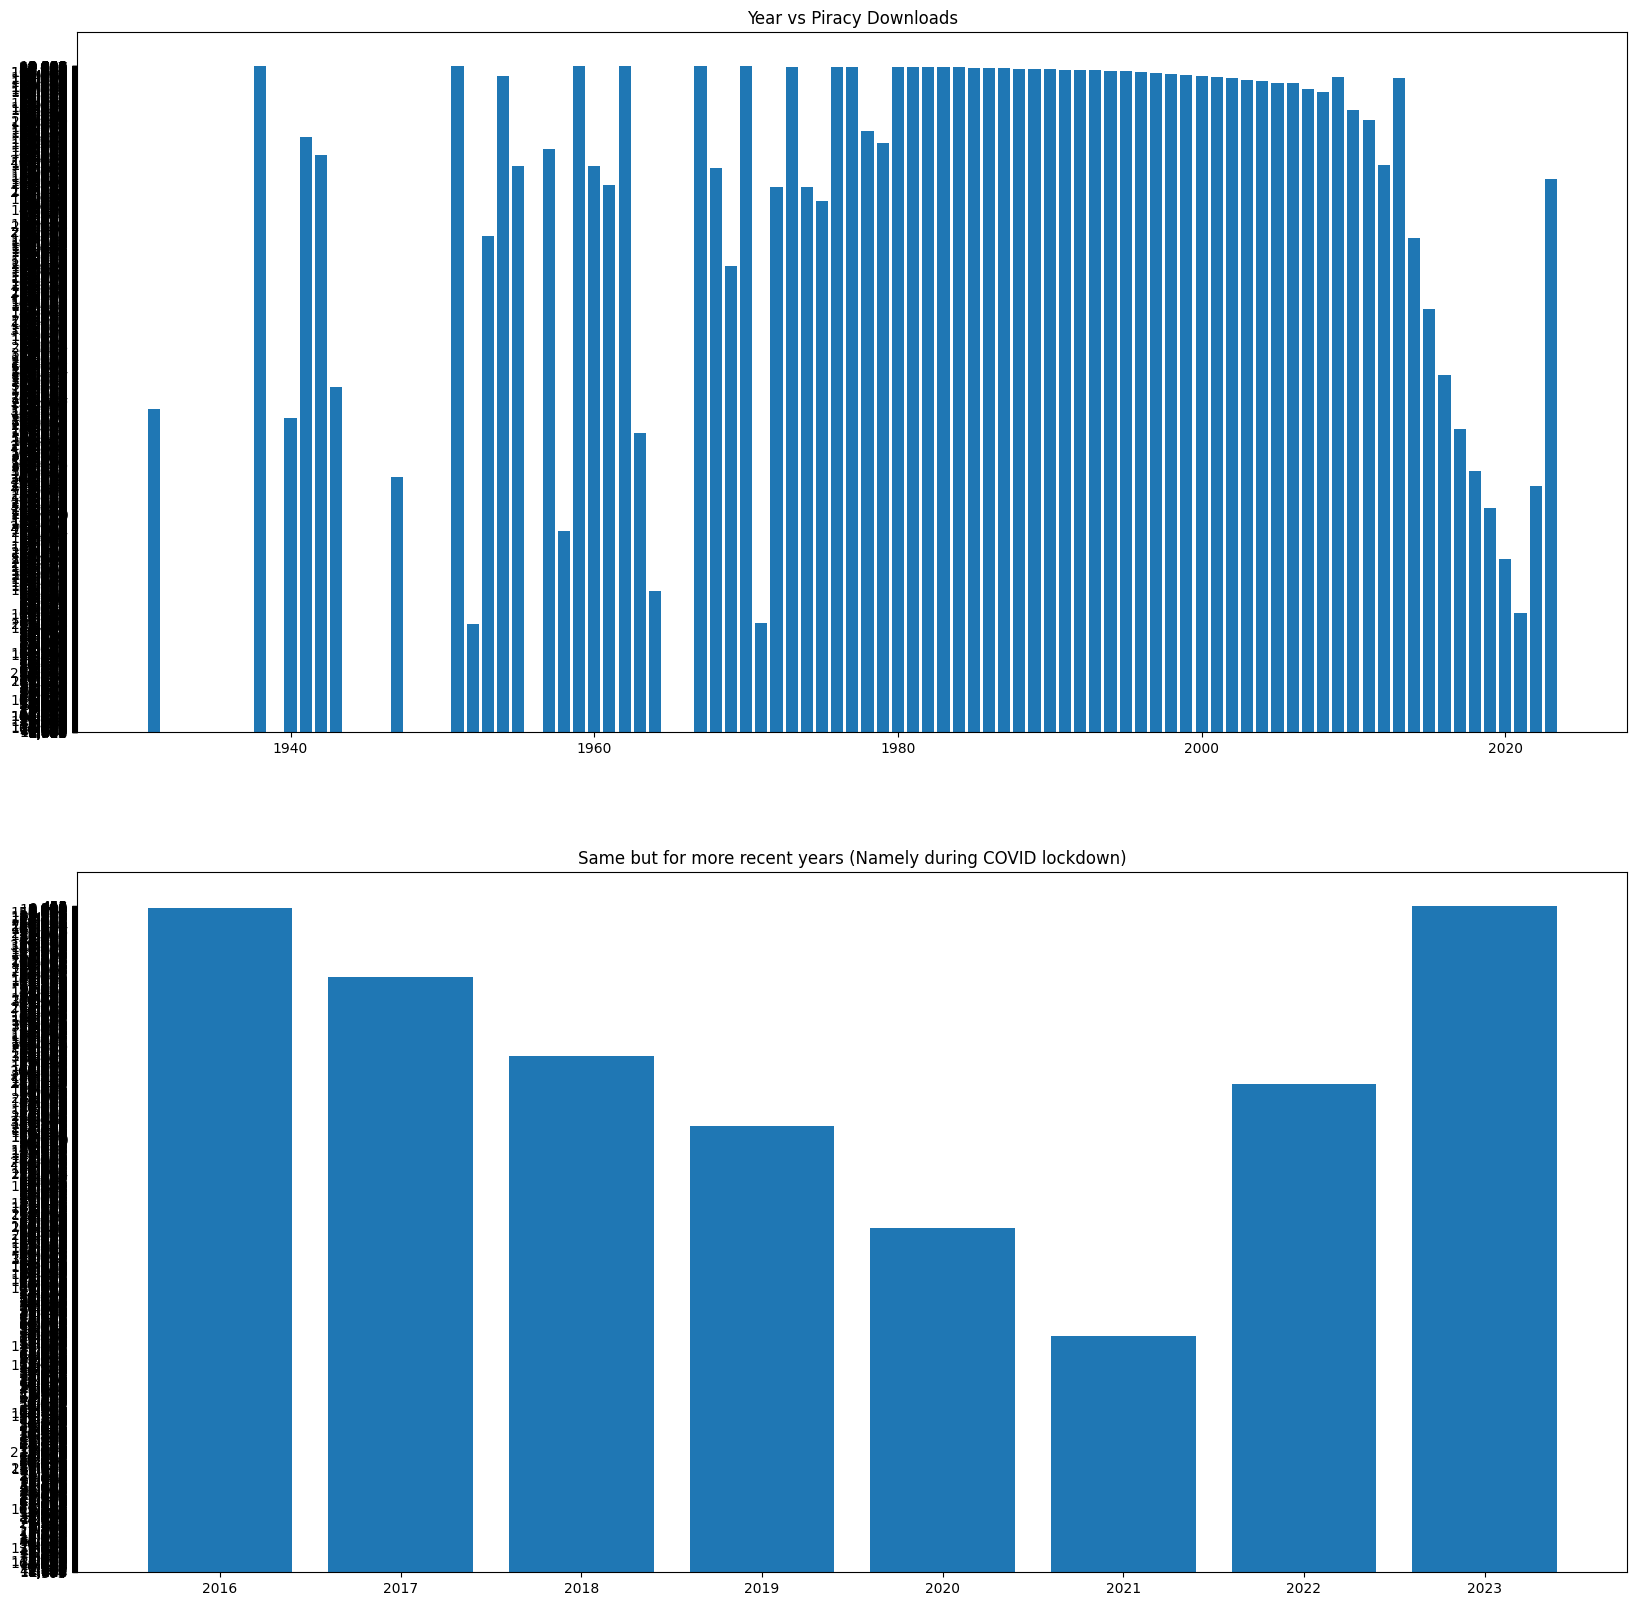

In [4]:
recent=df[df['release_year']>2015]
plt.figure(figsize=(10,6))
fig, axs = plt.subplots(2,figsize=(20,20))
axs[0].bar(df['release_year'],df['downloads'])
axs[1].bar(recent['release_year'],recent['downloads'])
axs[0].set_title(label='Year vs Piracy Downloads')
axs[1].set_title(label='Same but for more recent years (Namely during COVID lockdown)')

In [5]:
df.groupby('release_year').mean()

TypeError: Could not convert G to numeric

In [ ]:
plt.plot(sorted(df['release_year'].unique()),df.groupby('release_year').mean()['IMDb-rating'])

In [6]:
nominals = ['appropriate_for', 'director',  'industry', 'language', 'writer']
numerics = ['imdb_rating', 'downloads', 'posted_date', 'release_date', 'run_time', 'views']

Text(0.5, 1.0, 'nan value counts')

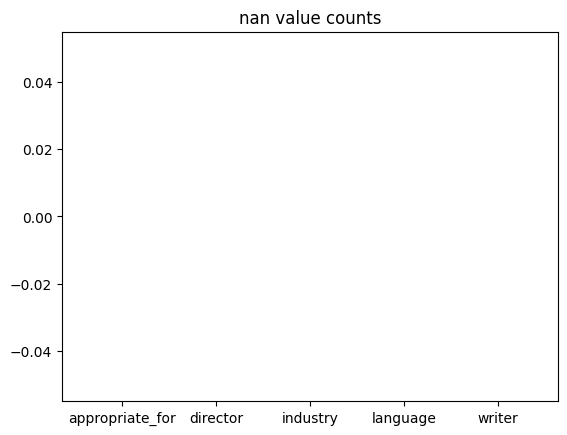

In [7]:
ax = nominals
ay = []
for attr in nominals:
    freq = 5
    ay.append(df[attr].isna().sum())
plt.bar(ax, ay)
plt.title(f'nan value counts')